In [1]:
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

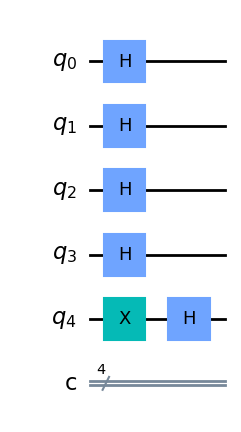

In [4]:
entrada = QuantumCircuit(5,4)
entrada.x(4)
entrada.h((0,1,2,3,4))
entrada.draw()

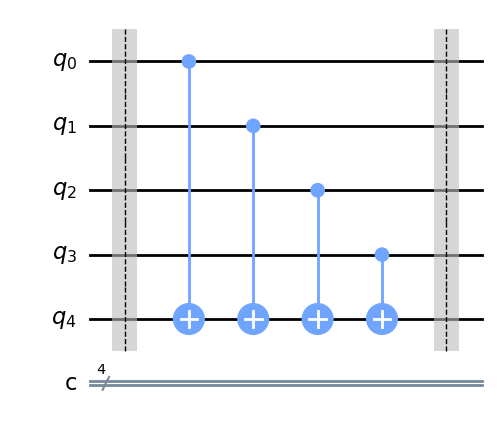

In [5]:
funcion = QuantumCircuit(5,4)
funcion.barrier(range(5))
funcion.cx(0,4)
funcion.cx(1,4)
funcion.cx(2,4)
funcion.cx(3,4)
funcion.barrier(range(5))
funcion.draw()

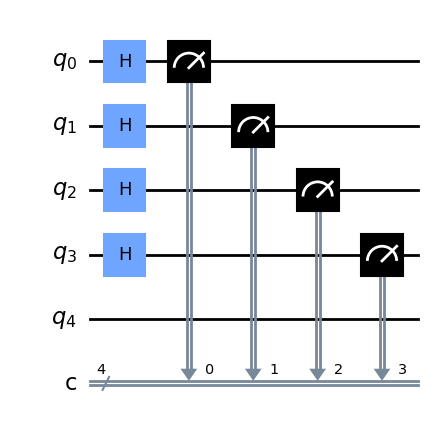

In [6]:
salida = QuantumCircuit(5,4)
salida.h((0,1,2,3))
salida.measure((0,1,2,3),(0,1,2,3))
salida.draw()

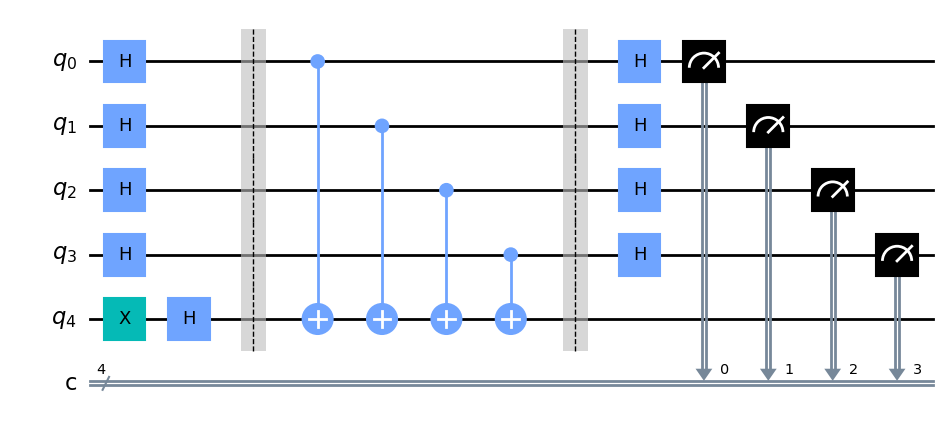

In [7]:
DJ = entrada.compose(funcion).compose(salida)
DJ.draw()

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
service = QiskitRuntimeService()
backend = service.get_backend("ibmq_qasm_simulator")
sampler = Sampler(backend)
job = sampler.run(DJ)
job.result()

SamplerResult(quasi_dists=[{15: 1.0}], metadata=[{'shots': 4000}])

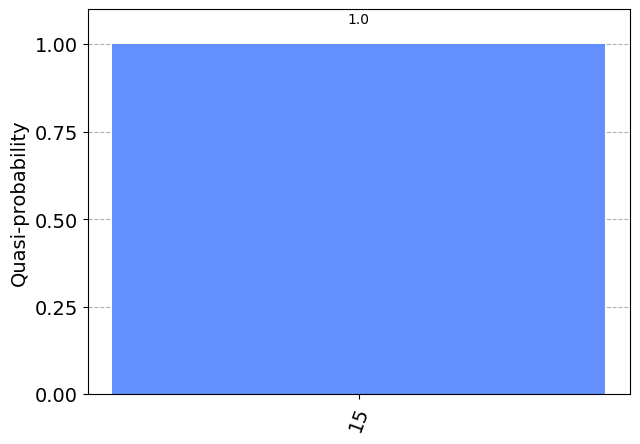

In [12]:
from qiskit.visualization import plot_histogram
plot_histogram(
    job.result().quasi_dists
)